In [1]:
import pandas as pd

In [6]:
data=pd.read_excel(r"C:\Users\najmu\Downloads\Diabetes Classification (Responses).xlsx")
data

,Timestamp,Name,Age,Gender,Quantity of sugar daily intake,Daily exercise (in mints),Sleeping hours,Family Diabetes\n(Father or mother has diabetes),Outcomes
0,2023-01-21 21:20:13.501,Shifana,23,Female,Small amount,none,Less than 7 hrs,No,No
1,2023-01-21 23:09:33.282,Unaiza nasrin,20,Female,Normal amount,Less than 30 min,more than 7 hrs,Yes,No
2,2023-01-21 23:22:24.023,Muhammed Ashique. E,22,Male,Normal amount,none,Less than 7 hrs,No,Yes
3,2023-01-21 23:26:22.056,Ahla,21,Female,Normal amount,Less than 30 min,Less than 7 hrs,No,No
4,2023-01-21 23:27:17.253,Nafih k,22,Male,Normal amount,more than 30 min,more than 7 hrs,No,No
...,...,...,...,...,...,...,...,...,...
333,2023-01-29 22:26:33.509,Fasil,20,Male,Normal amount,Less than 30 min,more than 7 hrs,Yes,No
334,2023-01-29 22:27:36.017,Fayiz,20,Male,Normal amount,more than 30 min,Less than 7 hrs,Yes,No
335,2023-01-29 22:28:22.506,Eyas,25,Female,Normal amount,more than 30 min,Less than 7 hrs,Yes,No
336,2023-01-31 18:59:18.079,Rasheena,33,Female,Normal amount,more than 30 min,more than 7 hrs,No,NaN


### Data Preprocessing

In [9]:
#check missing values
data.isnull().sum()

Timestamp                                           0
Name                                                0
Age                                                 0
Gender                                              0
Quantity of sugar daily intake                      0
Daily exercise (in mints)                           0
Sleeping hours                                      0
Family Diabetes\n(Father or mother has diabetes)    0
Outcomes                                            2
dtype: int64

In [12]:
data.dropna()

,Timestamp,Name,Age,Gender,Quantity of sugar daily intake,Daily exercise (in mints),Sleeping hours,Family Diabetes\n(Father or mother has diabetes),Outcomes
0,2023-01-21 21:20:13.501,Shifana,23,Female,Small amount,none,Less than 7 hrs,No,No
1,2023-01-21 23:09:33.282,Unaiza nasrin,20,Female,Normal amount,Less than 30 min,more than 7 hrs,Yes,No
2,2023-01-21 23:22:24.023,Muhammed Ashique. E,22,Male,Normal amount,none,Less than 7 hrs,No,Yes
3,2023-01-21 23:26:22.056,Ahla,21,Female,Normal amount,Less than 30 min,Less than 7 hrs,No,No
4,2023-01-21 23:27:17.253,Nafih k,22,Male,Normal amount,more than 30 min,more than 7 hrs,No,No
...,...,...,...,...,...,...,...,...,...
331,2023-01-29 22:20:11.746,Jithu,20,Male,Normal amount,more than 30 min,Less than 7 hrs,No,No
332,2023-01-29 22:24:56.399,Asif,23,Male,Normal amount,none,Less than 7 hrs,Yes,Yes
333,2023-01-29 22:26:33.509,Fasil,20,Male,Normal amount,Less than 30 min,more than 7 hrs,Yes,No
334,2023-01-29 22:27:36.017,Fayiz,20,Male,Normal amount,more than 30 min,Less than 7 hrs,Yes,No


In [28]:
data.drop(["Timestamp","Name"],axis = 1,inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_cols = ["Gender","Quantity of sugar daily intake","Daily exercise (in mints)","Sleeping hours ",
                    "Family Diabetes\n(Father or mother has diabetes)","Outcomes"]
for col in categorical_cols:
    data[col]=encoder.fit_transform(data[col])
data

,Age,Gender,Quantity of sugar daily intake,Daily exercise (in mints),Sleeping hours,Family Diabetes\n(Father or mother has diabetes),Outcomes
0,23,0,2,2,0,0,0
1,20,0,1,0,1,1,0
2,22,1,1,2,0,0,1
3,21,0,1,0,0,0,0
4,22,1,1,1,1,0,0
...,...,...,...,...,...,...,...
331,20,1,1,1,0,0,0
332,23,1,1,2,0,1,1
333,20,1,1,0,1,1,0
334,20,1,1,1,0,1,0


### Exploratory Data Analysis (EDA)

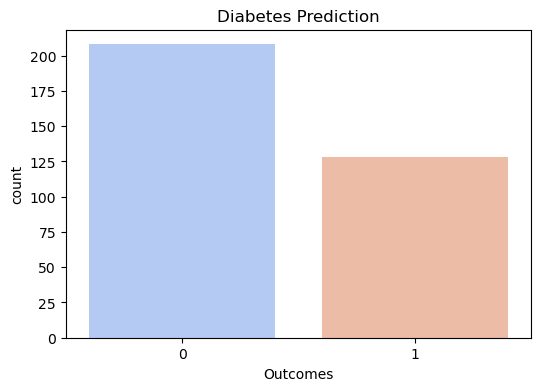

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Outcomes", data=data, hue="Outcomes", palette = "coolwarm", legend=False)
plt.title("Diabetes Prediction")
plt.show()

### Splitting Data

In [44]:
from sklearn.model_selection import train_test_split

x = data.drop(["Outcomes"],axis=1)
y = data["Outcomes"]

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2)

### Training Machine Learning Model

#### LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [53]:
model.score(x_test,y_test)

0.9705882352941176

#### RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)


RandomForestClassifier()

In [57]:
model_rf.score(x_test,y_test)

0.9705882352941176

In [60]:
import pickle

#save best model
with open ("diabetes_prediction.pkl","wb")as files:
    pickle.dump(model_rf, files)